
=== Explained Variance by Principal Components ===

 PC  Explained Variance Ratio  Cumulative Variance
PC1                  0.729624             0.729624
PC2                  0.228508             0.958132
PC3                  0.036689             0.994821
PC4                  0.005179             1.000000


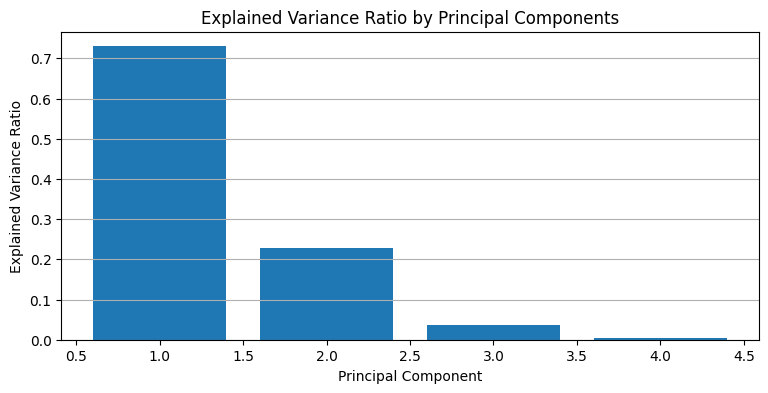

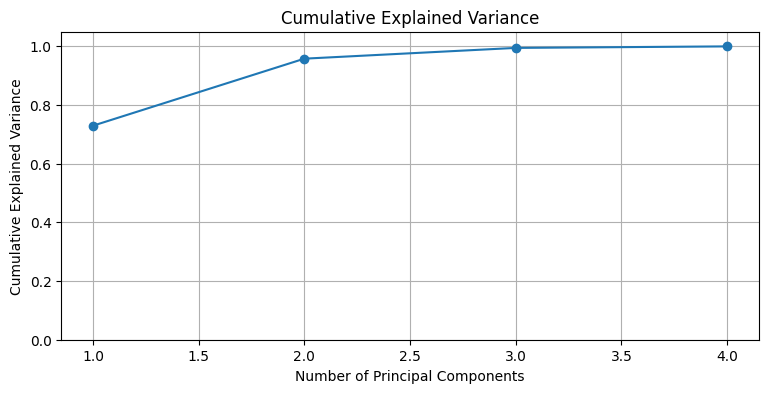


=== PCA with 2 Components ===
Explained Variance PC1: 0.7296
Explained Variance PC2: 0.2285
Total (PC1+PC2): 0.9581



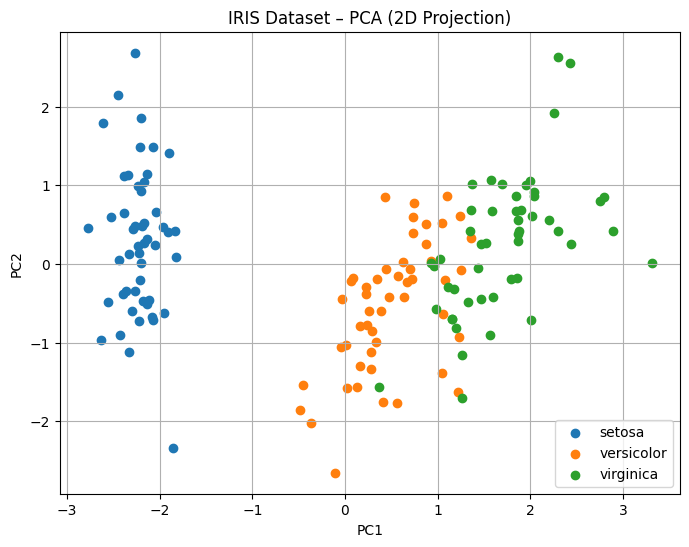

=== Feature Loadings (Contributions) ===

                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942


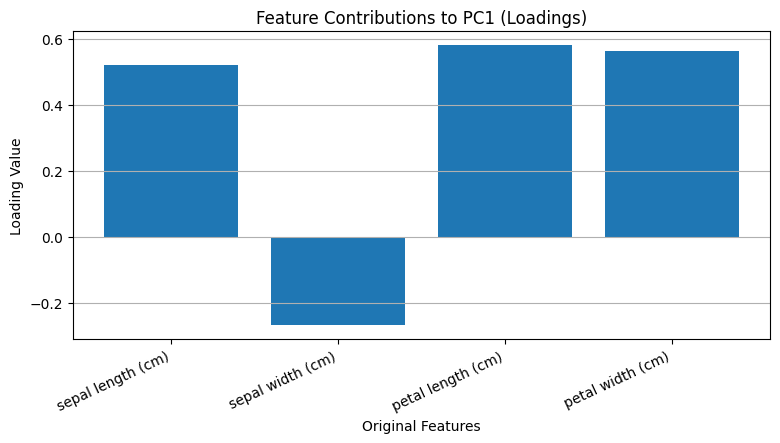

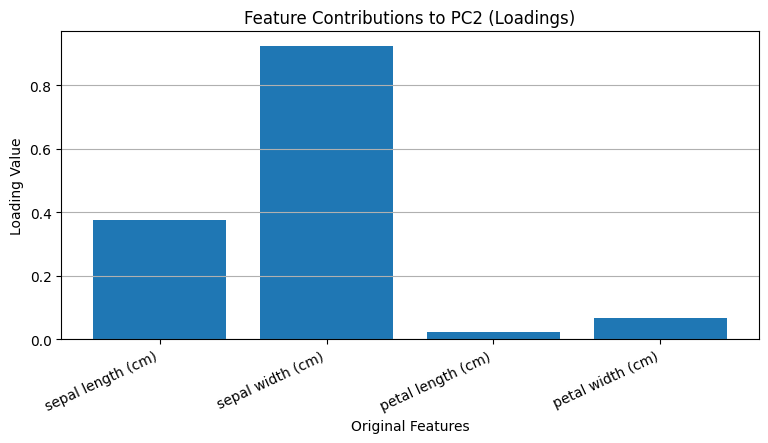


=== PCA Reduced Dataset (First 10 rows) ===

      PC1       PC2  target species
-2.264703  0.480027       0  setosa
-2.080961 -0.674134       0  setosa
-2.364229 -0.341908       0  setosa
-2.299384 -0.597395       0  setosa
-2.389842  0.646835       0  setosa
-2.075631  1.489178       0  setosa
-2.444029  0.047644       0  setosa
-2.232847  0.223148       0  setosa
-2.334640 -1.115328       0  setosa
-2.184328 -0.469014       0  setosa


In [1]:
# ------------------------------------------------------------
# Programming Assignment 28
# Dimensionality Reduction using PCA – IRIS Dataset (Case Study)
# Includes:
# 1) Standardization
# 2) PCA fitting (all components)
# 3) Explained variance + cumulative variance plots
# 4) 2D PCA scatter plot (PC1 vs PC2)
# 5) Feature contribution (loadings) bar plot for PC1 & PC2
# 6) Reduced dataset output (2 components)
# ------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -----------------------------
# 1) Load IRIS dataset
# -----------------------------
iris = load_iris(as_frame=True)
df = iris.frame.copy()

feature_cols = iris.feature_names
target_col = "target"

X = df[feature_cols].copy()
y = df[target_col].copy()

# -----------------------------
# 2) Standardize features
# (PCA is scale-sensitive)
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3) Fit PCA (all components)
# -----------------------------
pca = PCA()
X_pca_all = pca.fit_transform(X_scaled)

explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

# Print explained variance table
ev_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_var))],
    "Explained Variance Ratio": explained_var,
    "Cumulative Variance": cum_explained_var
})
print("\n=== Explained Variance by Principal Components ===\n")
print(ev_df.to_string(index=False))

# -----------------------------
# 4) Plot Explained Variance & Cumulative Variance
# -----------------------------
plt.figure(figsize=(9, 4))
plt.bar(range(1, len(explained_var) + 1), explained_var)
plt.title("Explained Variance Ratio by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(axis="y")
plt.show()

plt.figure(figsize=(9, 4))
plt.plot(range(1, len(cum_explained_var) + 1), cum_explained_var, marker="o")
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.ylim(0, 1.05)
plt.grid(True)
plt.show()

# -----------------------------
# 5) Reduce to 2D (PC1, PC2)
# -----------------------------
pca2 = PCA(n_components=2)
X_pca_2 = pca2.fit_transform(X_scaled)

pca2_ev = pca2.explained_variance_ratio_
print("\n=== PCA with 2 Components ===")
print(f"Explained Variance PC1: {pca2_ev[0]:.4f}")
print(f"Explained Variance PC2: {pca2_ev[1]:.4f}")
print(f"Total (PC1+PC2): {pca2_ev.sum():.4f}\n")

# -----------------------------
# 6) 2D Scatter Plot (PC1 vs PC2)
# -----------------------------
plt.figure(figsize=(8, 6))
for class_id, class_name in enumerate(iris.target_names):
    plt.scatter(
        X_pca_2[y == class_id, 0],
        X_pca_2[y == class_id, 1],
        label=class_name
    )

plt.title("IRIS Dataset – PCA (2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 7) Feature Contribution (Loadings) for PC1 & PC2
# Loadings = PCA components
# Rows: PCs, Columns: original features
# -----------------------------
loadings = pd.DataFrame(
    pca2.components_.T,
    index=feature_cols,
    columns=["PC1", "PC2"]
)
print("=== Feature Loadings (Contributions) ===\n")
print(loadings)

plt.figure(figsize=(9, 4))
plt.bar(loadings.index, loadings["PC1"])
plt.title("Feature Contributions to PC1 (Loadings)")
plt.xlabel("Original Features")
plt.ylabel("Loading Value")
plt.xticks(rotation=25, ha="right")
plt.grid(axis="y")
plt.show()

plt.figure(figsize=(9, 4))
plt.bar(loadings.index, loadings["PC2"])
plt.title("Feature Contributions to PC2 (Loadings)")
plt.xlabel("Original Features")
plt.ylabel("Loading Value")
plt.xticks(rotation=25, ha="right")
plt.grid(axis="y")
plt.show()

# -----------------------------
# 8) Final Reduced Dataset (PC1, PC2 + target)
# -----------------------------
pca_df = pd.DataFrame(X_pca_2, columns=["PC1", "PC2"])
pca_df["target"] = y
pca_df["species"] = pca_df["target"].map({i: n for i, n in enumerate(iris.target_names)})

print("\n=== PCA Reduced Dataset (First 10 rows) ===\n")
print(pca_df.head(10).to_string(index=False))
